## Lab 6: Write a program to understand Keras in 
# Tensorflow

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow import keras
import tensorflow as tf
%matplotlib inline

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### Plot 100 image in 10 x 10 Matrix

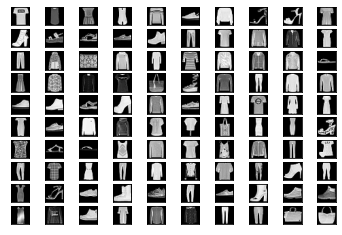

In [3]:
fig = plt.figure()
for i in range(1,101):
  ax1 = fig.add_subplot(10,10,i)
  plt.xticks([])
  plt.yticks([])
  ax1.imshow(x_train[i].reshape(28,28),cmap = 'gray')

### Display all unique labels in the dataset. There are 10 unique labels

In [4]:
print('This unique labels are: ',np.unique(y_train))

This unique labels are:  [0 1 2 3 4 5 6 7 8 9]


### Number of observations in training and testing dataset.

In [5]:
print('Number of training examples: ',x_train.shape[0])
print('Number of testing examples: ',x_test.shape[0])

Number of training examples:  60000
Number of testing examples:  10000


### Displaying shape of each image that is 28x 28

In [6]:
print('Size of each example is: ',x_train[0].shape)

Size of each example is:  (28, 28)


### Normalize the image and reshaping it.

In [7]:
x_train = x_train / 255.0

x_test = x_test / 255.0

### Defining Model

In [8]:
training_epochs = 10

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32,activation = 'relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,batch_size = 32,epochs = training_epochs,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5255 - accuracy: 0.8104 - val_loss: 0.4239 - val_accuracy: 0.8493
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3849 - accuracy: 0.8605 - val_loss: 0.3876 - val_accuracy: 0.8599
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3503 - accuracy: 0.8728 - val_loss: 0.3734 - val_accuracy: 0.8668
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3315 - accuracy: 0.8787 - val_loss: 0.3709 - val_accuracy: 0.8668
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3127 - accuracy: 0.8851 - val_loss: 0.3767 - val_accuracy: 0.8641
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3003 - accuracy: 0.8885 - val_loss: 0.3541 - val_accuracy: 0.8724
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2895 - accuracy: 0.8922 - val_loss: 0.3586 - val_accura

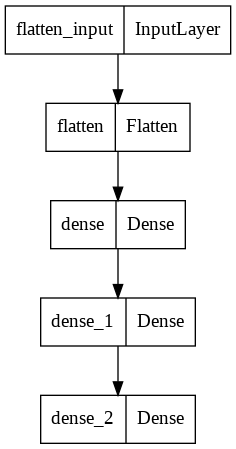

In [9]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

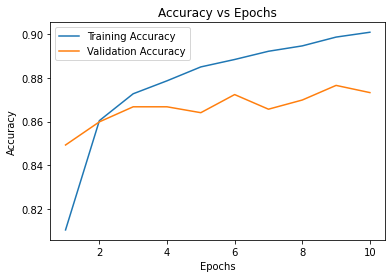

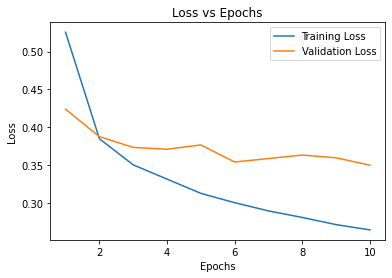

In [10]:
values1 = history.history

training_accuracy_1 = values1['accuracy']
training_loss_1 = values1['loss']
validation_accuracy_1 = values1['val_accuracy']
val_loss_1 = values1['val_loss']
epochs = range(1,training_epochs+1)

plt.plot(epochs,training_accuracy_1,label = 'Training Accuracy')
plt.plot(epochs,validation_accuracy_1,label = 'Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs,training_loss_1,label = 'Training Loss')
plt.plot(epochs,val_loss_1, label = 'Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()